In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 64
latent_dim = 100
num_epochs = 50
learning_rate = 0.0002

# Load and prepare the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16304603.31it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 499207.49it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4532543.86it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9185404.42it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# Define the Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.model(x)
        x = x.view(x.size(0), 1, 28, 28)
        return x

# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.model(x)
        return x



[Epoch 1/50] [D loss: 0.3175] [G loss: 2.0183]


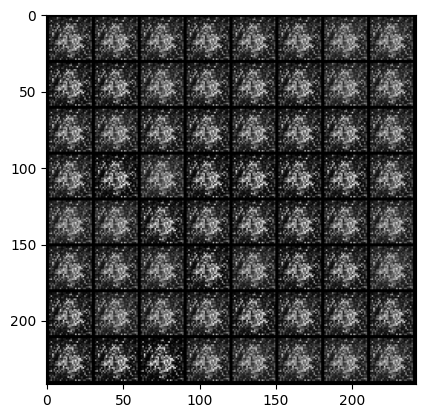

[Epoch 2/50] [D loss: 0.2340] [G loss: 2.7778]


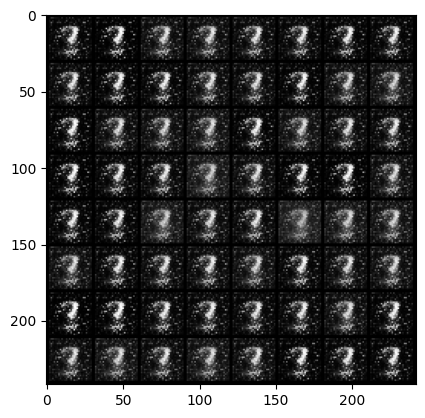

[Epoch 3/50] [D loss: 0.2110] [G loss: 2.9193]


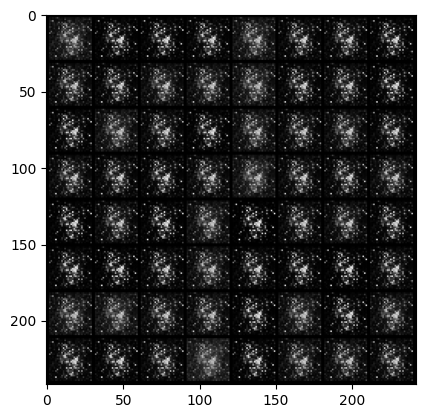

[Epoch 4/50] [D loss: 0.1829] [G loss: 3.0369]


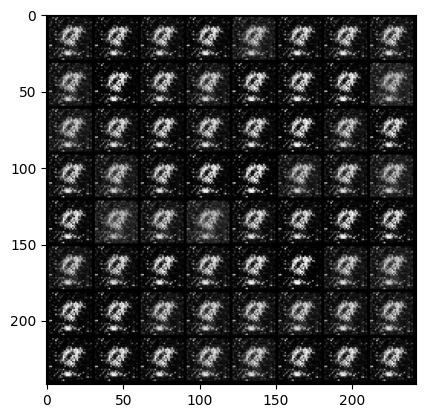

[Epoch 5/50] [D loss: 0.1884] [G loss: 2.9014]


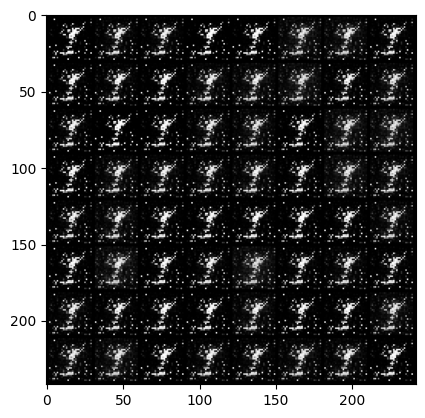

[Epoch 6/50] [D loss: 0.1908] [G loss: 3.1193]


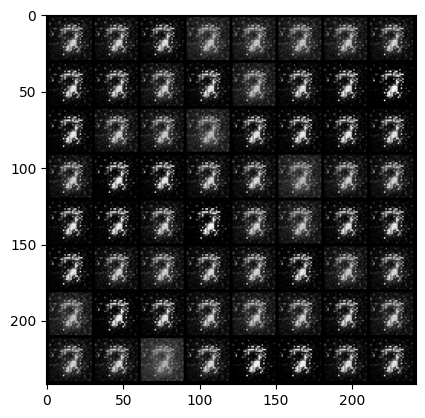

[Epoch 7/50] [D loss: 0.1906] [G loss: 3.0325]


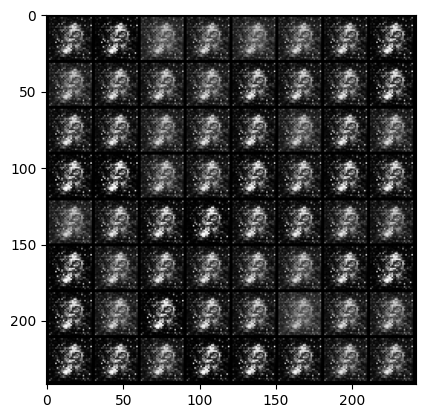

[Epoch 8/50] [D loss: 0.1689] [G loss: 3.1568]


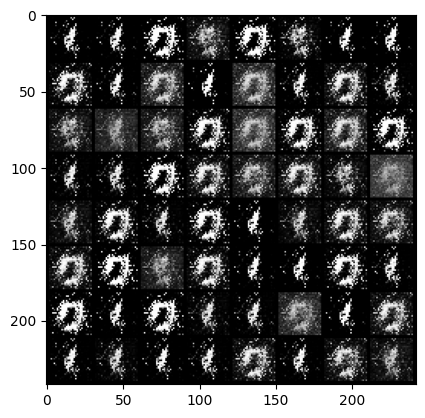

[Epoch 9/50] [D loss: 0.1696] [G loss: 3.2596]


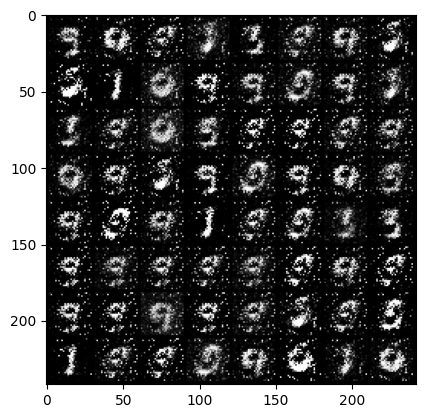

[Epoch 10/50] [D loss: 0.2371] [G loss: 2.6470]


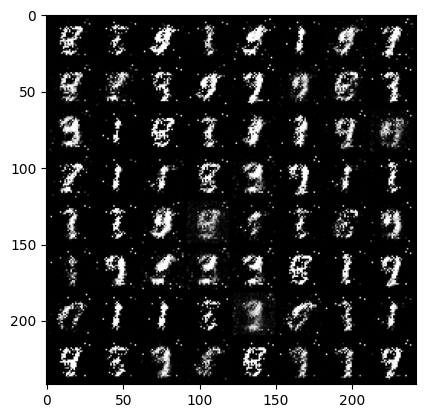

[Epoch 11/50] [D loss: 0.2480] [G loss: 2.5099]


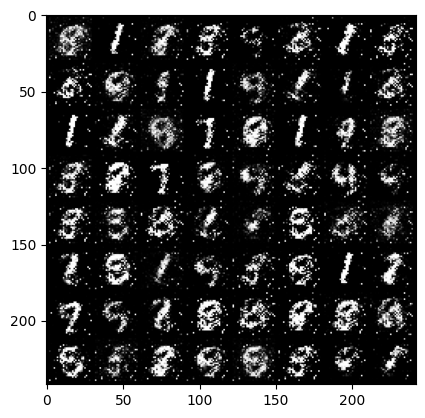

[Epoch 12/50] [D loss: 0.3249] [G loss: 1.9831]


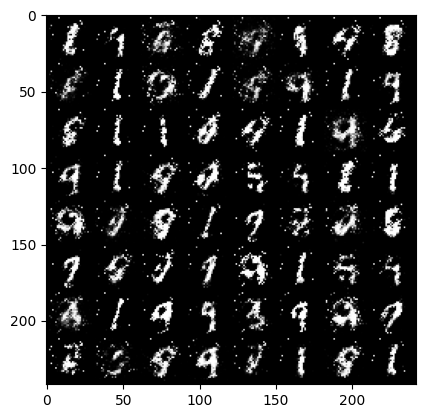

[Epoch 13/50] [D loss: 0.3534] [G loss: 1.8427]


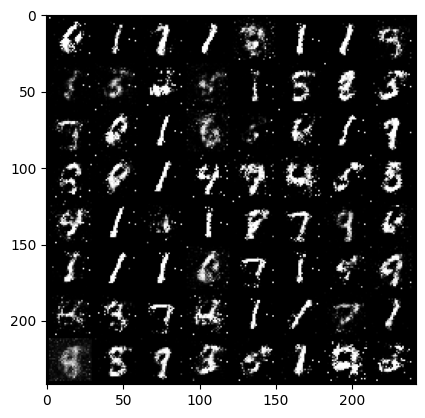

[Epoch 14/50] [D loss: 0.3968] [G loss: 1.6624]


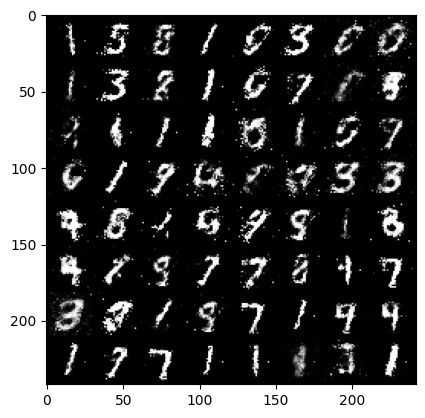

[Epoch 15/50] [D loss: 0.4162] [G loss: 1.5927]


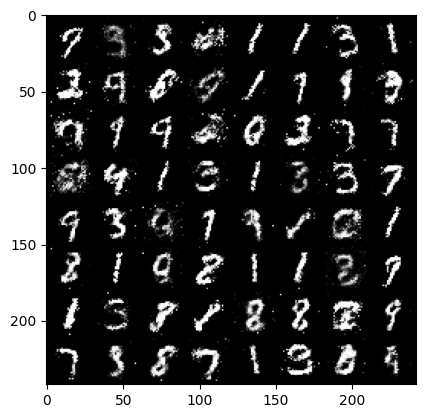

[Epoch 16/50] [D loss: 0.4219] [G loss: 1.5605]


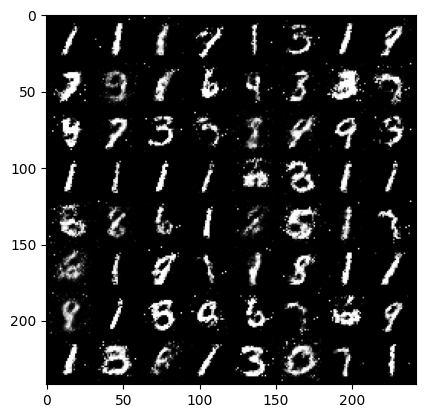

[Epoch 17/50] [D loss: 0.4349] [G loss: 1.5197]


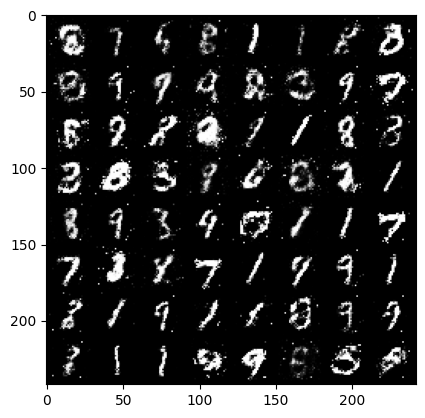

[Epoch 18/50] [D loss: 0.4397] [G loss: 1.4945]


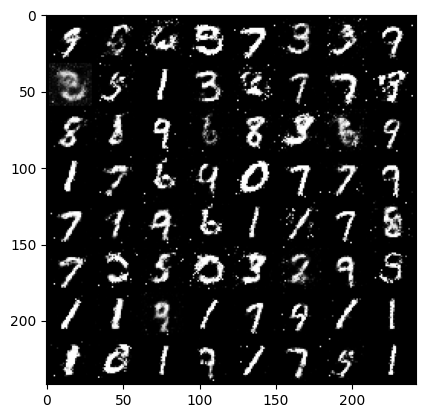

[Epoch 19/50] [D loss: 0.4538] [G loss: 1.4503]


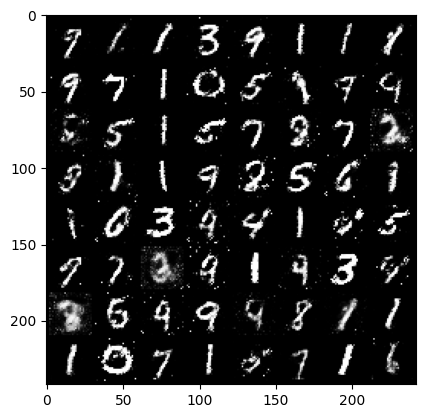

[Epoch 20/50] [D loss: 0.4565] [G loss: 1.4424]


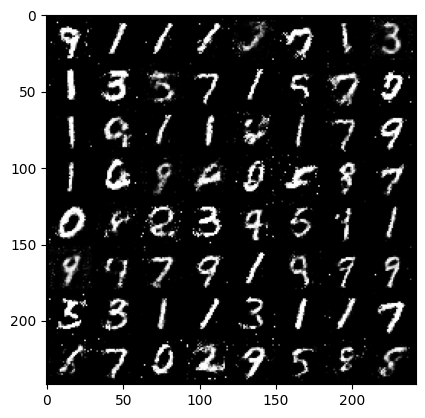

[Epoch 21/50] [D loss: 0.4678] [G loss: 1.4107]


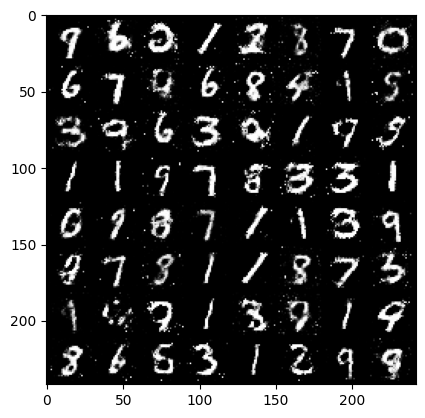

[Epoch 22/50] [D loss: 0.4702] [G loss: 1.4026]


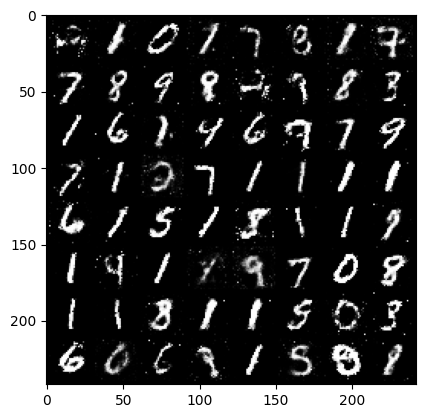

[Epoch 23/50] [D loss: 0.4662] [G loss: 1.4172]


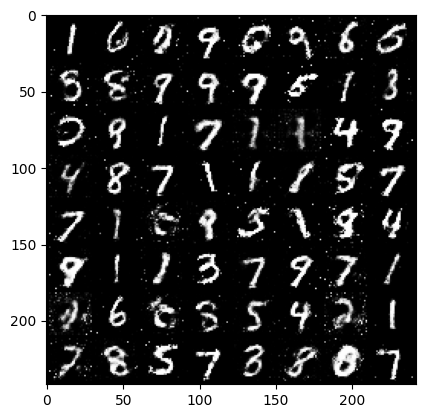

[Epoch 24/50] [D loss: 0.4697] [G loss: 1.4020]


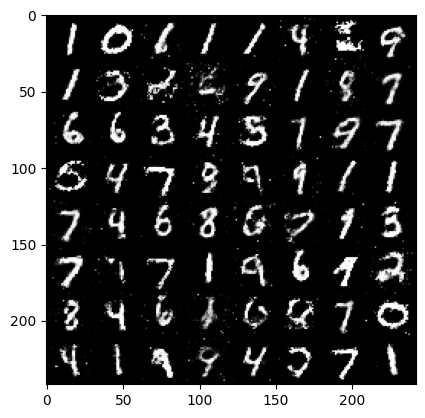

[Epoch 25/50] [D loss: 0.4713] [G loss: 1.3968]


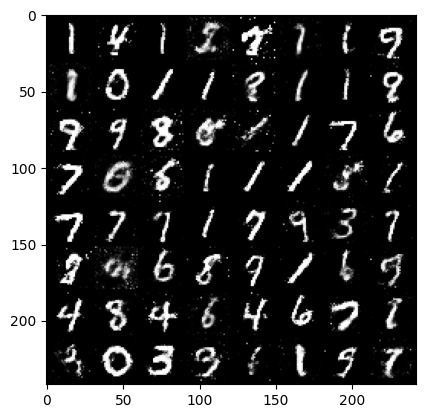

[Epoch 26/50] [D loss: 0.4776] [G loss: 1.3801]


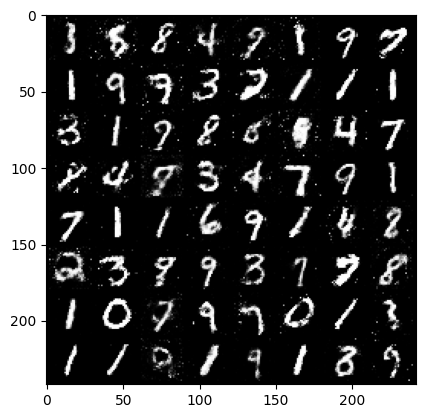

[Epoch 27/50] [D loss: 0.4819] [G loss: 1.3631]


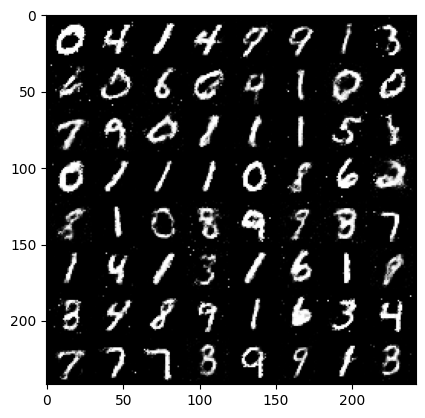

[Epoch 28/50] [D loss: 0.4817] [G loss: 1.3595]


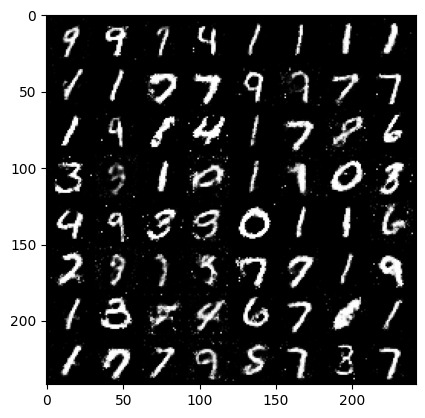

[Epoch 29/50] [D loss: 0.4855] [G loss: 1.3493]


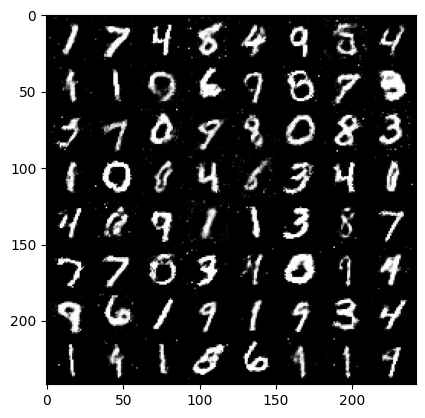

[Epoch 30/50] [D loss: 0.4841] [G loss: 1.3466]


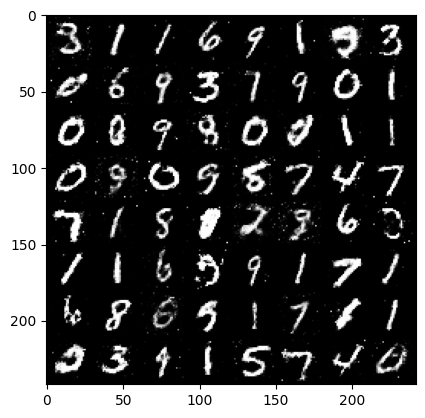

[Epoch 31/50] [D loss: 0.4814] [G loss: 1.3566]


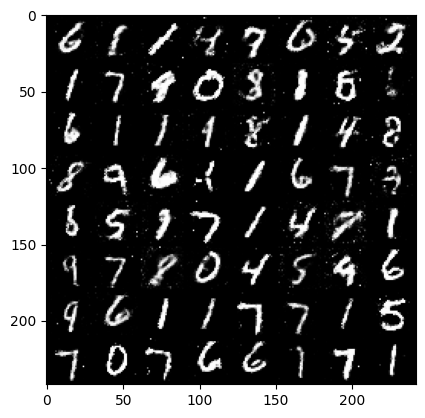

[Epoch 32/50] [D loss: 0.4820] [G loss: 1.3538]


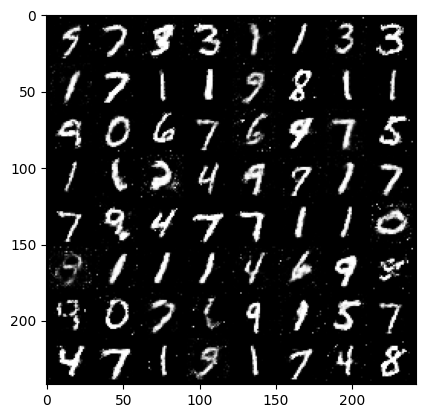

[Epoch 33/50] [D loss: 0.4808] [G loss: 1.3569]


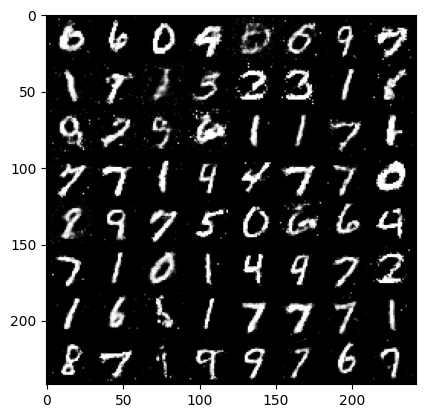

[Epoch 34/50] [D loss: 0.4859] [G loss: 1.3409]


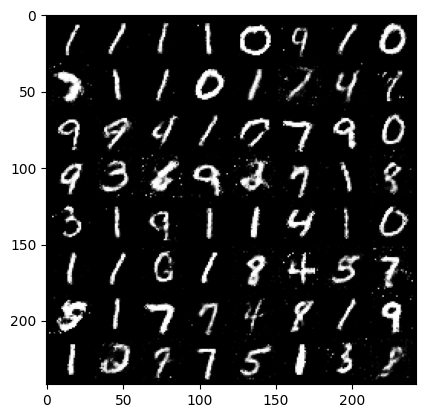

[Epoch 35/50] [D loss: 0.4844] [G loss: 1.3450]


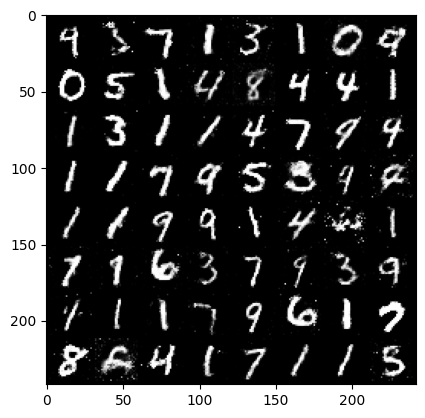

[Epoch 36/50] [D loss: 0.4805] [G loss: 1.3564]


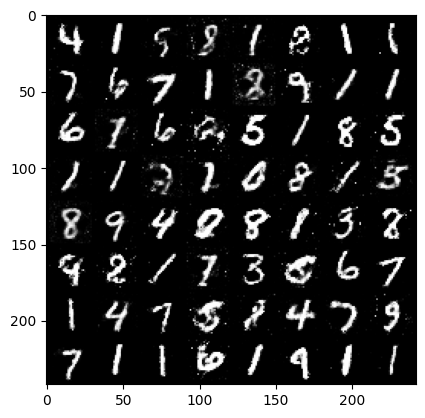

[Epoch 37/50] [D loss: 0.4819] [G loss: 1.3550]


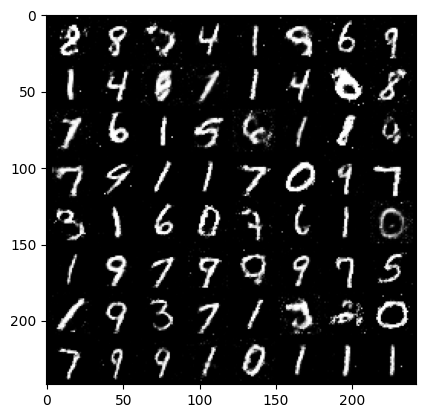

[Epoch 38/50] [D loss: 0.4833] [G loss: 1.3502]


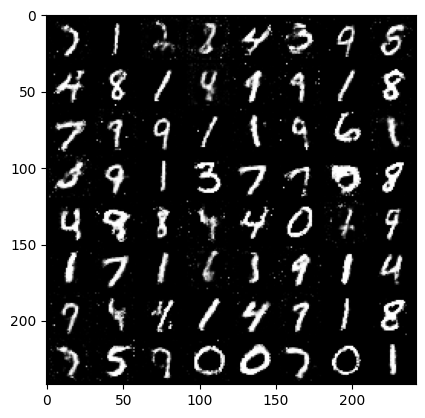

[Epoch 39/50] [D loss: 0.4814] [G loss: 1.3459]


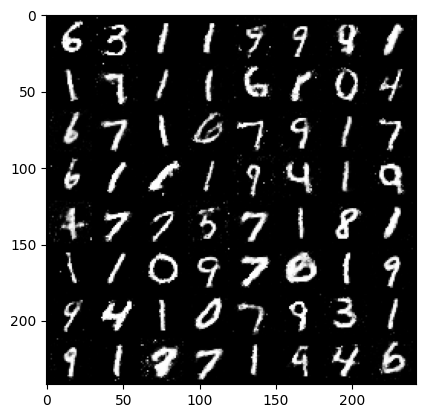

[Epoch 40/50] [D loss: 0.4827] [G loss: 1.3477]


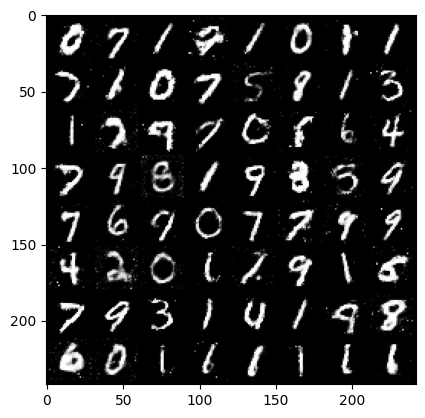

[Epoch 41/50] [D loss: 0.4834] [G loss: 1.3447]


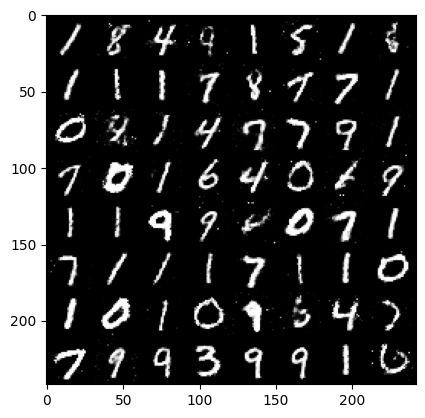

[Epoch 42/50] [D loss: 0.4820] [G loss: 1.3477]


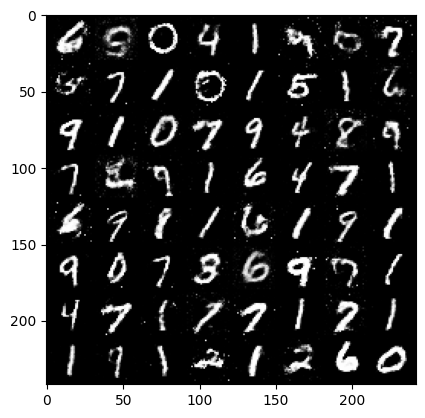

[Epoch 43/50] [D loss: 0.4841] [G loss: 1.3419]


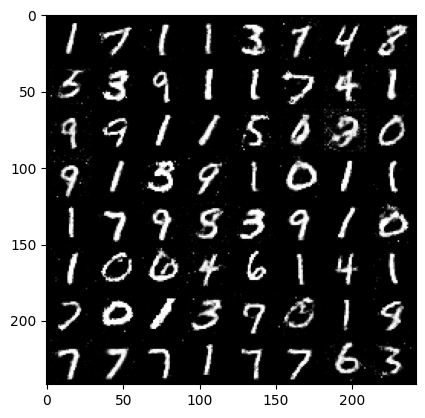

[Epoch 44/50] [D loss: 0.4856] [G loss: 1.3380]


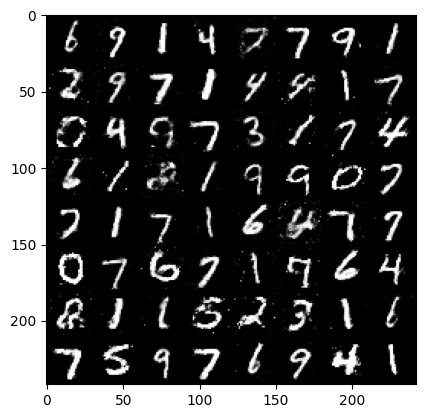

[Epoch 45/50] [D loss: 0.4871] [G loss: 1.3276]


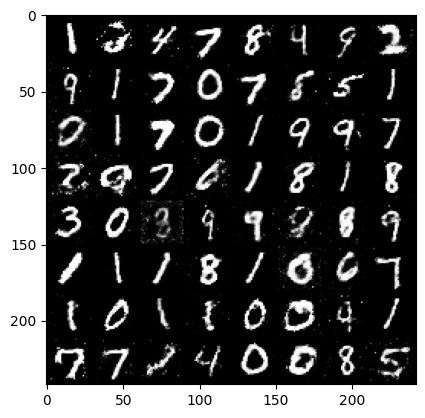

[Epoch 46/50] [D loss: 0.4837] [G loss: 1.3363]


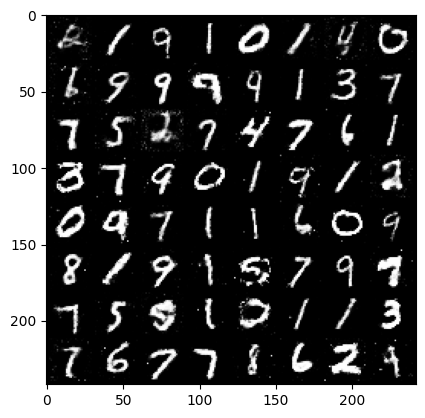

[Epoch 47/50] [D loss: 0.4836] [G loss: 1.3376]


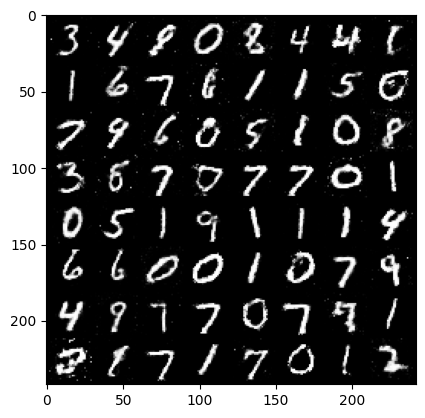

[Epoch 48/50] [D loss: 0.4828] [G loss: 1.3374]


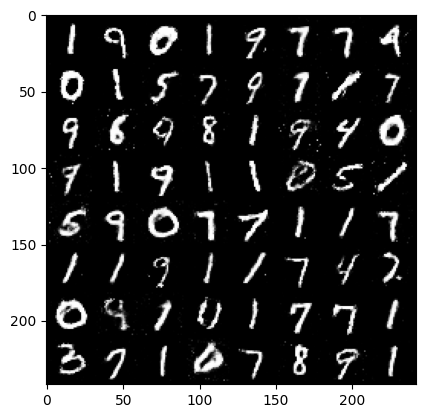

[Epoch 49/50] [D loss: 0.4796] [G loss: 1.3450]


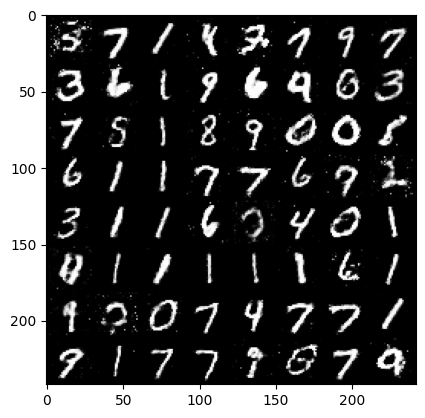

[Epoch 50/50] [D loss: 0.4806] [G loss: 1.3459]


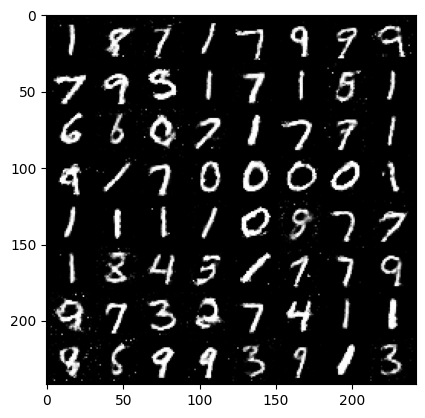

In [4]:
import torchvision


# Instantiate the models
generator = Generator(latent_dim)
discriminator = Discriminator()

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# Training loop
for epoch in range(num_epochs):
    g_loss_epoch = 0
    d_loss_epoch = 0
    for i, (imgs, _) in enumerate(trainloader):

        batch_size = imgs.size(0)

        # Labels for real and fake data
        valid = torch.ones(batch_size, 1)
        fake = torch.zeros(batch_size, 1)

        # Train Generator
        optimizer_G.zero_grad()

        z = torch.randn(batch_size, latent_dim)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), valid)

        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()

        real_loss = criterion(discriminator(imgs), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # Accumulate the losses for the epoch
        g_loss_epoch += g_loss.item()
        d_loss_epoch += d_loss.item()

    # Print the average losses after each epoch
    print(f"[Epoch {epoch+1}/{num_epochs}] [D loss: {d_loss_epoch/len(trainloader):.4f}] [G loss: {g_loss_epoch/len(trainloader):.4f}]")

    # Save some generated images after each epoch
    with torch.no_grad():
        test_z = torch.randn(64, latent_dim)
        test_gen_imgs = generator(test_z)
        test_gen_imgs = test_gen_imgs.view(64, 1, 28, 28)
        grid_img = torchvision.utils.make_grid(test_gen_imgs, nrow=8, normalize=True)
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
        plt.show()

In [6]:
# Function to generate and display images based on input number
def generate_and_display_images(generator, num_images):
    if num_images < 1 or num_images > 10:
        raise ValueError("num_images must be a positive integer in the range 1 to 10.")

    with torch.no_grad():
        z = torch.randn(num_images * num_images, latent_dim)
        gen_imgs = generator(z)
        gen_imgs = gen_imgs.view(num_images * num_images, 1, 28, 28)
        grid_img = torchvision.utils.make_grid(gen_imgs, nrow=num_images, normalize=True)
        plt.figure(figsize=(num_images, num_images))
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
        plt.axis('off')
        plt.show()



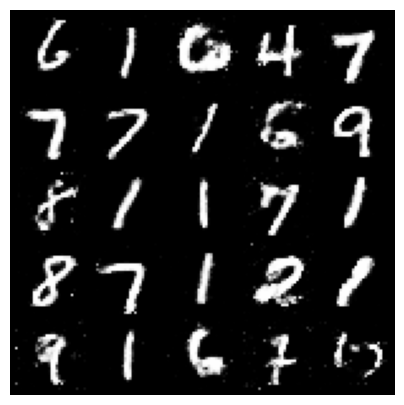

In [7]:
# Example usage: generate and display a grid of 5x5 images
generate_and_display_images(generator, 5)